In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [233]:
train = pd.read_csv('titanic_train.csv')
test =  pd.read_csv('titanic_test.csv')

## 1.EDA

### 1-1.全体感

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [13]:
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Train_flg        0
dtype: int64

In [58]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1-2.割合 

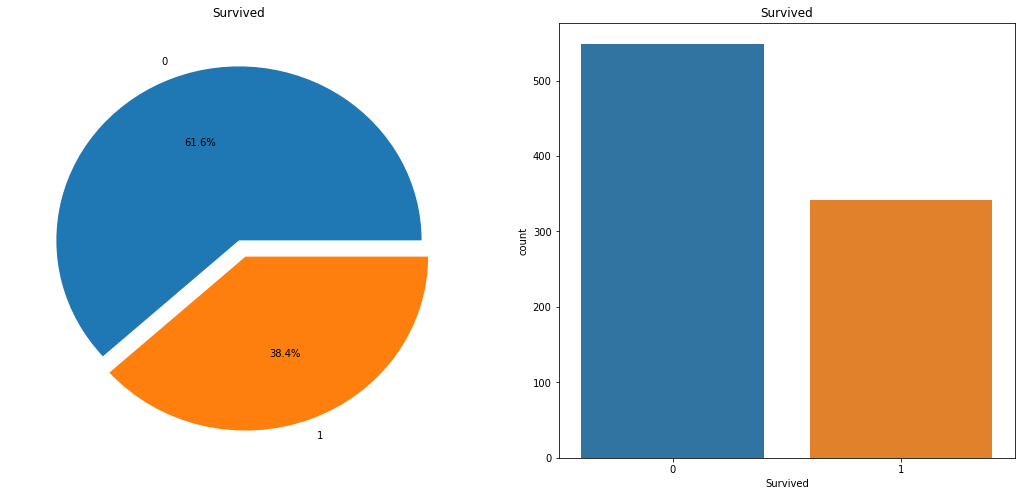

In [26]:
1f,ax=plt.subplots(1,,figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [64]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [62]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


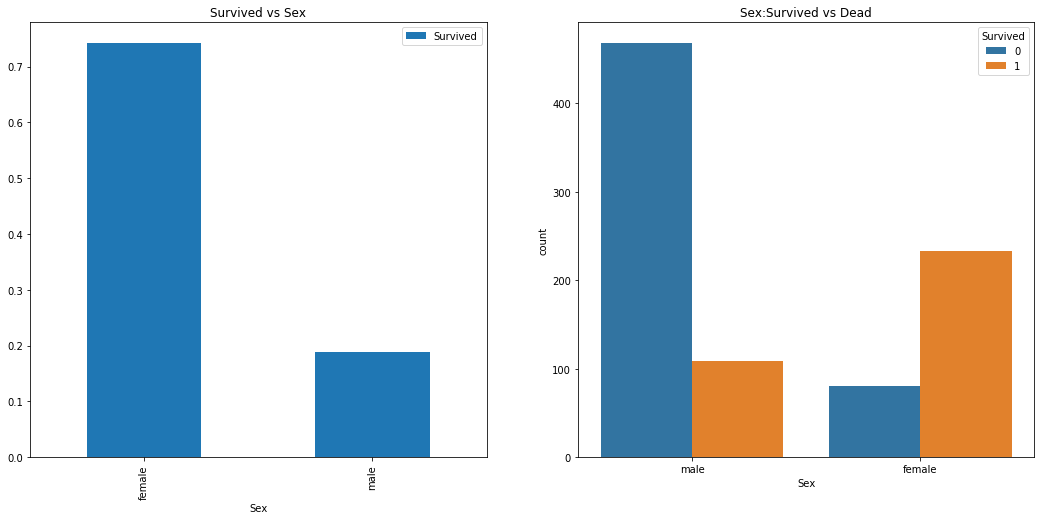

In [44]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [296]:
train[['Sex', 'Survived']].corr()

,Sex,Survived
Sex,1.000000,0.543351
Survived,0.543351,1.000000


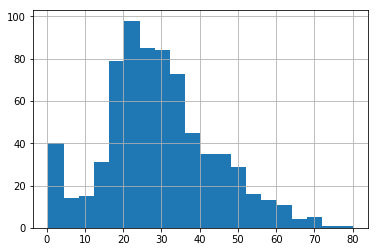

In [92]:
#年齢層
train['Age'].hist(bins=20)

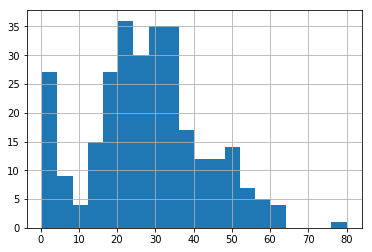

In [77]:
#年齢ごと生存者
train['Age'][train['Survived'] == 1].hist(bins=20)

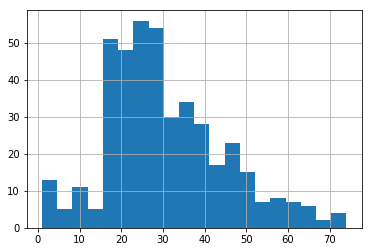

In [79]:
#年齢ごと死亡者
train['Age'][train['Survived'] == 0].hist(bins=20)

In [297]:
train[['Age', 'Survived']].corr()

,Age,Survived
Age,1.00000,-0.06491
Survived,-0.06491,1.00000


In [ ]:
#上記より、年齢が若く（子供）で、女性の方が優先的に助かりやすい。

In [86]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [87]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


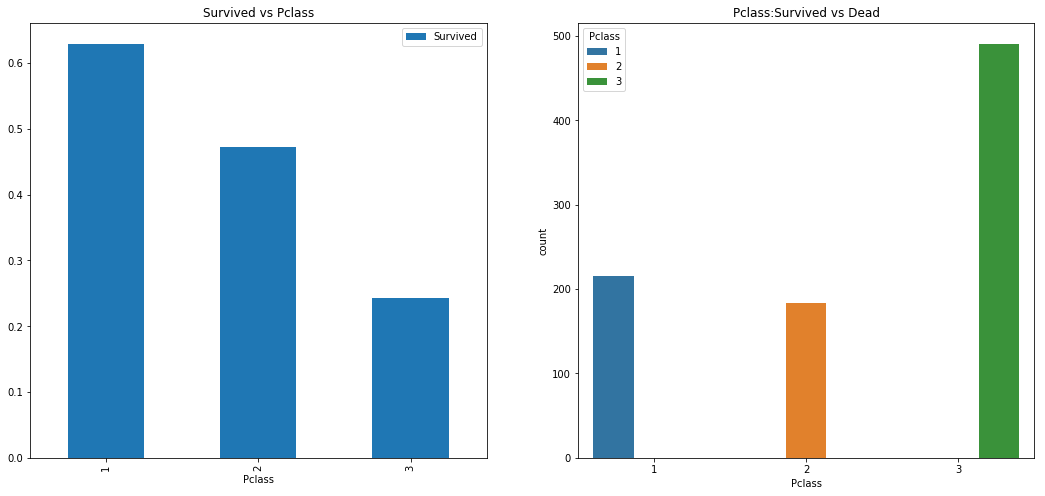

In [88]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Pclass')
sns.countplot('Pclass',hue='Pclass',data=train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

In [299]:
train[['Pclass', 'Survived']].corr()

,Pclass,Survived
Pclass,1.000000,-0.338481
Survived,-0.338481,1.000000


In [89]:
#上記より、チケットの階級が高い方が優先的に助かりやすい。

In [118]:
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [119]:
#SibSp:兄弟/配偶者の数
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [99]:
train.shape

(891, 13)

In [100]:
test.shape

(418, 12)

In [98]:
data.shape

(1309, 14)

## 2.前処理

In [234]:
train['Train_flg'] = True
test['Train_flg'] = False

In [235]:
data = pd.concat([train, test])
data = data.reset_index() 

### 2-1.Sex

In [236]:
data['Sex'][data['Sex'] == 'male'] = 0
data['Sex'][data['Sex'] == 'female'] = 1
data['Sex'] = data['Sex'].astype(int)

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 2-2.Embarked

In [170]:
data['Embarked'].value_counts()

#S = Southampton
#C = Cherbourg
#Q = Queenstown

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [237]:
#欠損値に最頻値を代入
data['Embarked'].fillna(data.Embarked.mode(), inplace=True)

In [238]:
data_dummies = data['Embarked']
data_dummies = pd.get_dummies(data_dummies)

data = pd.concat([data, data_dummies], axis=1)
data = data.drop(['Embarked'], axis=1)

### 2-3.Age

In [239]:
data['Age'].fillna(data.Age.median(), inplace=True)

In [240]:
data['Family_Size'] = data['SibSp'] + data['Parch']
data = data.drop(['SibSp', 'Parch'], axis=1)

In [185]:
data.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Train_flg,C,Q,S,Family_Size
0,0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,NaN,True,0,0,1,1
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C85,True,1,0,0,1
2,2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,NaN,True,0,0,1,0
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,C123,True,0,0,1,1
4,4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,NaN,True,0,0,1,0


In [241]:
data['Fare'][data['Fare'].isnull() == True] = data['Fare'].mode()[0]

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [242]:
data = data[['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Train_flg', 'C', 'Q', 'S', 'Family_Size', 'Survived']]

In [249]:
data.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age              0
Fare             0
Train_flg        0
C                0
Q                0
S                0
Family_Size      0
Survived       418
dtype: int64

In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       1309 non-null   int64  
 1   Sex          1309 non-null   int64  
 2   Age          1309 non-null   float64
 3   Fare         1308 non-null   float64
 4   Train_flg    1309 non-null   bool   
 5   C            1309 non-null   uint8  
 6   Q            1309 non-null   uint8  
 7   S            1309 non-null   uint8  
 8   Family_Size  1309 non-null   int64  
 9   Survived     891 non-null    float64
dtypes: bool(1), float64(3), int64(3), uint8(3)
memory usage: 66.6 KB


## 3.Modeling

In [267]:
train = data[data['Train_flg'] == True]
test = data[data['Train_flg'] == False]

In [268]:
train = train.drop(['Train_flg'], axis=1)
test = test.drop(['Train_flg'], axis=1)

In [271]:
train = train.drop(['PassengerId'], axis=1)

In [272]:
test = test.drop('Survived', axis=1)

In [273]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [277]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Family_Size'], dtype='object')

In [283]:
X_test.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'C', 'Q', 'S', 'Family_Size'], dtype='object')

## 3-1.Logistic Regression

In [274]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/Users/kotasho/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


80.25

## 3-2.Support Vector Machines

In [285]:
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

68.01

## 3-3.KNN

In [286]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.06

## 3-4.Random Forest

In [294]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.75

In [295]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN', 'Random Forest'],
    'Score': [acc_log, acc_svc, acc_knn, acc_random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.75
2,KNN,84.06
0,Logistic Regression,80.25
1,Support Vector Machines,68.01
